# OneCourt: Tennis Tracking CNN

The goal of this notebook is to develop a CNN that can track a tennis ball as it travels throughout a tennis court during a game. 

### Training Data
Data Source (Tennis): TrackNet https://nol.cs.nctu.edu.tw:234/open-source/TrackNet  

Excel File Structure: 

 * OneCourt \ AITennisTracker \ Dataset \ game[1-10] \ Clip[1-N] \ [####].jpg AND Label.csv AND Tennis Match.mp4
     * Label.csv: 
         * “File Name”, “Visibility Class”, “X”, “Y”, “Trajectory Pattern”
         * X, Y: “X” and “Y” indicate the coordinate of the tennis in a pixel coordinate
         * Visibility Class: 0 (ball not in image), 1 (ball identified), 2 (ball in image, but not easily identified, 3 (ball is hidden behind something, such as player or net)
         * Status: 0 (flying), 1 (hit), 2 (bouncing)


### Input
The input of the model is video (live or recorded) of a tennis match. 
*what are video requirements? i.e. resolution, camera location, etc?

### Output
The output of the model will be the relative coordinates of the balls position (X, Y) and a third coordinate of status (Z).
         
* X: Horizontal Tennis Ball position in frame
* Y: Vertical Tennis Ball position in frame
* Status: 0 (flying), 1 (hit), 2 (bouncing)

### Model Architecture

### How To
* Run the model
* Input Data
* Requirements

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


import cv2
import glob
import os
from PIL import Image

## Data Exploration

In [29]:
#read in csv of labels for clip1
label1 = pd.read_csv('OneCourt\AITennisTracker\Dataset\game1\Clip1\Label.csv')
label1

,file name,visibility,x-coordinate,y-coordinate,status
0,0000.jpg,1,599.0,423.0,0.0
1,0001.jpg,1,601.0,406.0,0.0
2,0002.jpg,1,601.0,388.0,0.0
3,0003.jpg,1,598.0,371.0,0.0
4,0004.jpg,1,598.0,353.0,0.0
...,...,...,...,...,...
202,0202.jpg,1,1171.0,553.0,0.0
203,0203.jpg,1,1198.0,577.0,0.0
204,0204.jpg,1,1230.0,607.0,0.0
205,0205.jpg,1,1261.0,639.0,0.0


In [21]:
#plays video with local video player
frameWidth = 640
frameHeight = 480
game1 = cv2.VideoCapture('OneCourt\AITennisTracker\Dataset\game1\Clip1\Tennis Match.mp4')
while True:
    success, img = game1.read()
    img = cv2.resize(img, (frameWidth, frameHeight))
    
    cv2.imshow("Result", img)
    
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [20]:
filelist = glob.glob('OneCourt\AITennisTracker\Dataset\game1\Clip1\*.jpg')

clips = []
# Load in the images
for filepath in filelist:
    clips.append(cv2.imread('{0}'.format(filepath),0))

print(type(clips[0]))

<class 'numpy.ndarray'>


In [22]:
clips[0]

array([[  1,  10,  10, ...,   5,   6,   1],
       [ 69,  69,  58, ...,  84,  80,  70],
       [138, 130, 112, ..., 173, 151, 125],
       ...,
       [141, 141, 141, ..., 141, 141, 141],
       [141, 141, 141, ..., 141, 141, 141],
       [141, 141, 141, ..., 141, 141, 141]], dtype=uint8)

In [25]:
#displays image in local image viewer
cv2.imshow('image', clips[0])
cv2.waitKey(0)

-1

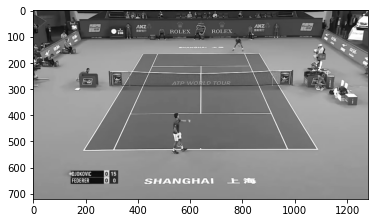

In [26]:
#display first image
image = clips[0]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [100]:
print(image.shape)

(720, 1280, 3)


In [34]:
label1.loc[0]

file name       0000.jpg
visibility             1
x-coordinate         599
y-coordinate         423
status                 0
Name: 0, dtype: object

In [115]:
label1.size

1035

In [117]:
720/1280

0.5625

In [126]:
10 * (1280/720)

17.77777777777778

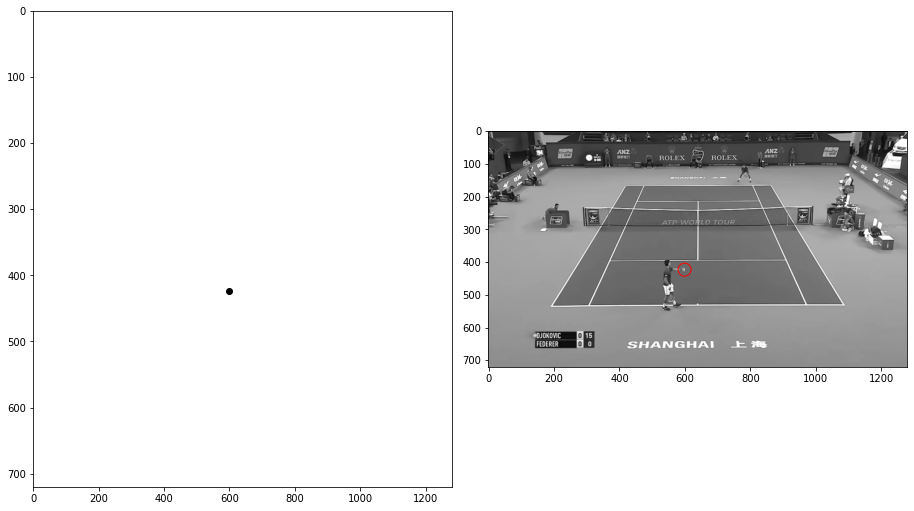

In [147]:
x = label1.iloc[0, 2] #x-cordinate
y = label1.iloc[0, 3] #y-cordinate

plt.rcParams["figure.figsize"] = [12.8, 7.2]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(1, 2)#, figsize=(12.8, 7.2))

#plot tennis match image
image = clips[0]
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = cv2.resize(image, (1280, 720))
plt.imshow(image, )

# plot tennis ball position
ax[0].plot(x, y, 'o', color='black')
ax[0].set_xlim((0, 1280))
ax[0].set_ylim((720, 0))


# plot circle around tennis ball
circle2 = plt.Circle((x, y), 20, color='r', fill=False)
ax[1].add_patch(circle2)

plt.show()

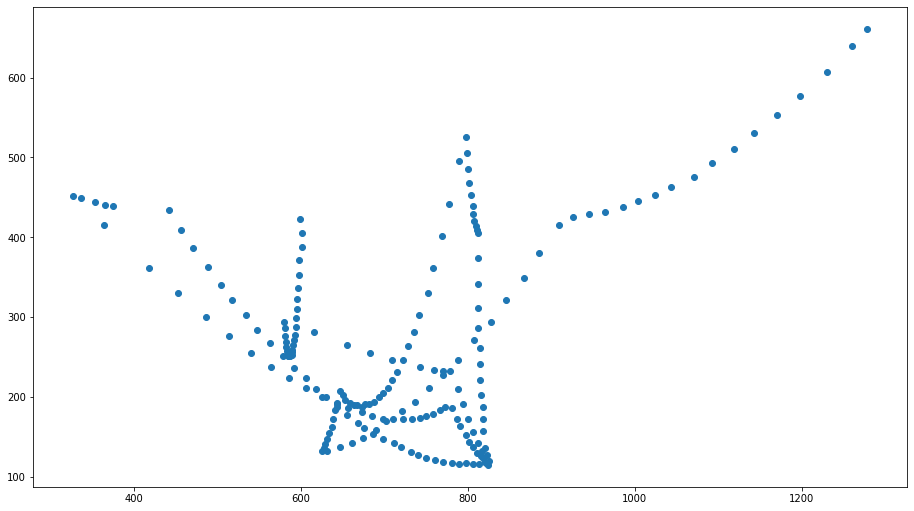

In [155]:
x = label1.iloc[:, 2] #x-cordinates
y = label1.iloc[:, 3] #y-cordinates
plt.scatter(x, y)

In [156]:
label1.size

1035

In [157]:
label1

,file name,visibility,x-coordinate,y-coordinate,status
0,0000.jpg,1,599.0,423.0,0.0
1,0001.jpg,1,601.0,406.0,0.0
2,0002.jpg,1,601.0,388.0,0.0
3,0003.jpg,1,598.0,371.0,0.0
4,0004.jpg,1,598.0,353.0,0.0
...,...,...,...,...,...
202,0202.jpg,1,1171.0,553.0,0.0
203,0203.jpg,1,1198.0,577.0,0.0
204,0204.jpg,1,1230.0,607.0,0.0
205,0205.jpg,1,1261.0,639.0,0.0


In [164]:
label1.visibility.unique()

array([1, 2, 0, 3], dtype=int64)

In [169]:
print('Size of Game 1: ', label1.size)

print()

print('   (0) Ball not in image: ', label1[label1.visibility == 0].size)
print('   (1) Ball in image: ', label1[label1.visibility == 1].size)
print('   (2) Ball not easily identified: ', label1[label1.visibility == 2].size)
print('   (3) Ball is occluded: ', label1[label1.visibility == 3].size)

print()

print('Proportion "Good" Images (1): ', round(label1[label1.visibility == 1].size/label1.size, 2))

Size of Game 1:  1035

   (0) Ball not in image:  20
   (1) Ball in image:  925
   (2) Ball not easily identified:  85
   (3) Ball is occluded:  5

Proportion "Good" Images (1):  0.89


In [ ]:
# How should we handle ball visibility? Ball is invisible 20/1035 of the first game .
# Should we remove them? How will machine handle NULL values? 

In [163]:
label1.status.unique()

array([ 0.,  1.,  2., nan])

In [185]:
print('Size of Game 1: ', label1.size)

print()

print('   (0) Ball Flying: ', label1[label1.status == 0].size)
print('   (1) Ball Hit: ', label1[label1.status == 1].size)
print('   (2) Ball Bounce: ', label1[label1.status == 2].size)
print('   (nan) Unlabeled: ', label1[np.isnan(label1.status)].size)

print()

print('Proportion "Bad" Images (nan): ', round(label1[np.isnan(label1.status)].size/label1.size, 2))

Size of Game 1:  1035

   (0) Ball Flying:  945
   (1) Ball Hit:  45
   (2) Ball Bounce:  25
   (nan) Unlabeled:  20

Proportion "Bad" Images (nan):  0.02


In [170]:
label1[label1.status == 0].size

945

## Data Preparation

## Model Training

## Evaluate Model

## Parameter Tuning

## Predictions